# Test countries analysis: Puerto Rico
These notebooks apply the harmonizer model to each of the shapefiles provided in the `roifiles/` sub-directory:
- Contiguous US ("CONUS") 
- Germany 
- Spain 
- France 
- Italy 
- Japan 
- Mauritius 
- Nicaragua 
- Puerto Rico **featured in this notebook**
- El Salvador
- Uganda

As a prerequisite to executing this analyis the harmonizer must be run to get the outputs. This can be done for all countries in the test folder at once. To run, simply to go command line (at root level of this repo) and enter:

`$ python -m harmonizer.main -a`

It will take ~40 min (2-3 minutes for each country, except the US which takes 20+).

Results for all will be in the `outputs/<country_shapefile_name>` and `results/<country_shapefile_name>` sub-directories.

In [1]:
from IPython.display import Image, Video
from harmonizer.diagnostics import *
from harmonizer.config import DMSP_CLIP, VIIRS_CLIP
from harmonizer.plots import difference_plots
import seaborn as sns
import matplotlib.pyplot as plt

## Puerto Rico time lapse raw vs harmonized

A time lapse video of nighttimme lights from 1992 - present (DMSP-OLS until 2013, then VIIRS-DNB).

In [2]:
results_dir = "gadm36_PRI_0"
Video(f"../results/{results_dir}/raw.mp4",width=700)

The fluctuations in DMSP are visible and the shift to VIIRS-DNB (which is measured in completely different units) is so abrupt that the image goes nearly dark.

Puerto Rico is small, but has a high level of lit areas.

Here's the time lapse after the harmonization:

In [3]:
Video(f"../results/{results_dir}/final.mp4",width=700)

DMSP-OLS fluctuations remain although they're dampened, but the VIIRS-DNB is coherent. VIIRS frames show the senstiivity in areas outside San Juan and dense urban areas (like road networks) but the overall light levels appear (visually) consistent.

## Analysis of 2013 annual composite where DMSP-OLS and VIIRS-DNB overlap (used for training)

### Visual comparison

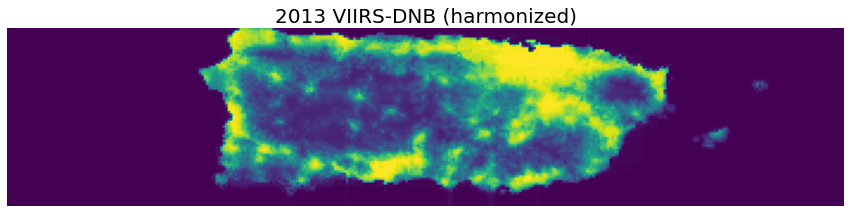

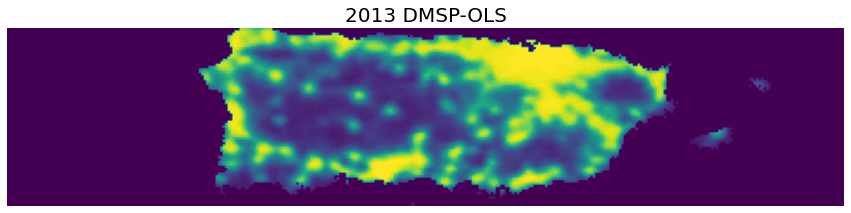

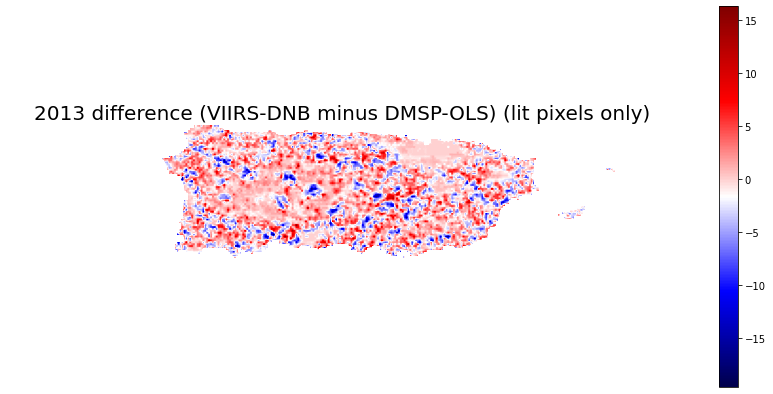

In [4]:
difference_plots(Path(Path.cwd().parent, "results", results_dir, "2013_comparison_raster.tif"))

Most of the island shows higher relative VIIRS-DNB, indicating that even after harmonization, the VIIRS is showing higher radiance. There are clusters of realtively high DMSP (due to saturation) throughout, although the harmonizer appears to have corrected San Juan fairly well as it has near zero difference (slightly higher VIIRS).

### Histogram of 2013 DMSP-OLS and VIIRS-DNB for Puerto Rico

![hist](../results/gadm36_PRI_0/2013hist.png)

The histogram shows a decent alignment in distribution of VIIRS after harmonization (blue) and DMSP (red). The Anderson-Darling non-paramentric test of variance in distribution failed to reject the null (that these are drawn from the same population) -- i.e. no evidence that these samples vary significantly. Curiously the DMSP-OLS calibration process coerced data such that no digital number fell in a few values (18, 34, 48). You can also note the more uniform distribution of light from 0 to 63 compared to other countries that have a much higher ration of 0/near-zero pixels.

#### Scattepot of 2013 VIIRS-DNB (after harmonization) and DMSP-OLS for Puerto Rico
![scatter](../results/gadm36_PRI_0/2013scatter.png)

Scatter shows a very strong linear alignment of VIIRS-DNB (after harmonization) and DMSP-OLS. A low RMSD (<4) and Spearman R that's very (0.97).

## Time series of annual composites (1992-2020) after harmonization
In all plots, pixels with a "digital number" of less than 3 have been masked.

### Mean radiance per pixel (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_PRI_0/harmonized_ts_mean.png)

### Median radiance per pixel (DMSP-OLS-like "digital number")

![ts md](../results/gadm36_PRI_0/harmonized_ts_median.png)

### Sum of Lights (DMSP-OLS-like "digital number")

![ts mean](../results/gadm36_PRI_0/harmonized_ts_sum.png)

There's a large peak in the DMPS series in early 2000s that drops dramatically -- unclear if this is an artifact or observed phenomenon  but the DMSP to VIIRs trend is very consistent and coherent. 

Also noteworthy that the global correction for DMSP in 2010 (F182010) appears to have over-corrected for Puerto Rico...an indication that local stepwise calibration would be better for this ROI rather than the global method as compared to other countries.